# Places-CNN model from MIT

In [2]:
rd = '/media/charles/1TB/Users/Charles Olivier/Downloads/ACHRI Models/Places205/' # contains model files
tp = '/home/charles/Documents/UCL/ACHRI/models/test-pics/' # contains test images

### Directory Structure

In [24]:
# model files:
# *.prototxt = description of the network in a caffe format
# *.caffemodel = the pretrained weights
# *.binaryproto or *.mean = mean image from training set
# .csv (opt) = a file that contains the labels to each category
ls -l "$rd"

total 226984
-rwxrwxrwx 1 charles charles      3604 Oct  9  2014 categoryIndex_places205.csv*
-rwxrwxrwx 1 charles charles      4085 Oct 15  2014 places205CNN_deploy_FC7.prototxt*
-rwxrwxrwx 1 charles charles      4494 Mar 13  2015 places205CNN_deploy.prototxt*
-rwxrwxrwx 1 charles charles 230834149 May 31  2014 places205CNN_iter_300000.caffemodel*
-rwxrwxrwx 1 charles charles    786446 May 17  2014 places205CNN_mean.binaryproto*
-rwxrwxrwx 1 charles charles    786640 Apr 27  2014 places_mean.mat*


In [13]:
# test images
ls -l $tp

total 328
-rw-rw-r-- 1 charles charles  14431 Feb 22 18:36 charles-hs2.jpeg
-rw-rw-r-- 1 charles charles  61502 Feb 22 17:17 just-russ2.jpg
-rw-rw-r-- 1 charles charles 246427 Feb 22 21:37 russ-with-friends-in-park.jpg


### Preliminary Imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# change this to your install dir
caffe_root = '~/Downloads/caffe-master/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Load Mean Image

In [4]:
mean_filename=rd+'./places205CNN_mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean = caffe.io.blobproto_to_array(a)[0]

In [16]:
# check mean.shape --> determines `image_dims` in Classifier below
mean.shape

(3, 256, 256)

### Load Model Using Pretrained Weights

In [6]:
net_pretrained=rd+'./places205CNN_iter_300000.caffemodel'
net_model_file=rd+'./places205CNN_deploy.prototxt'
net = caffe.Classifier(net_model_file, net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(10, 3, 227, 227)


### Test Model Using A New Image

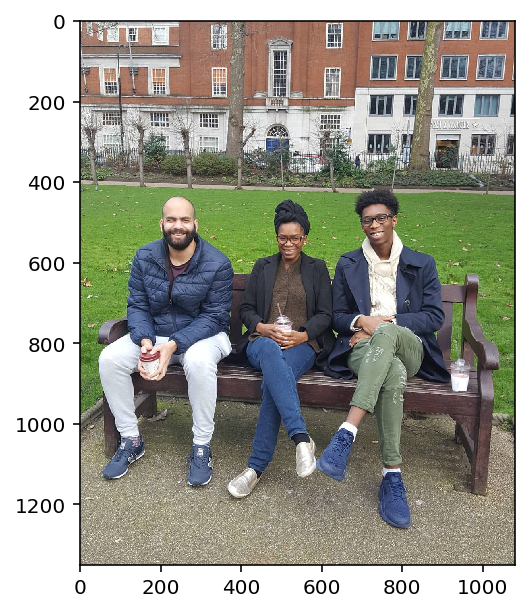

In [7]:
example_image = tp+'charles-hs2.jpeg'
example_image = tp+'russ-with-friends-in-park.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [8]:
# test model
prediction = net.predict([input_image]) 

### Load Categories and Output Prediction Classes

In [41]:
import csv
categories = []
with open(rd+'categoryIndex_places205.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        categories.append(str(row).split()[0][2:])

In [61]:
most_likely = prediction[0].argsort()[-5:][::-1]
for likely in most_likely:
    print('{:25} {:.2f}'.format(categories[likely], prediction[0][likely]))


/v/vegetable_garden       0.14
/p/playground             0.13
/y/yard                   0.09
/h/herb_garden            0.05
/p/picnic_area            0.05
